<h3>Cannabis Sales Revenue Pre & Post Covid - US & Canada</h3>

<h4>Introduction</h4>
<br><body>We chose to examine the Cannabis industry in relation to COVID pre and post because of all the legality happening in the space currently.  Given that people were home bound, we expected to see a huge increase in revenue due to the pandemic however we were surprised</body>

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib import dates
import os
from datetime import *
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import pylab as pl
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

#Change directory where the notebook is pointing from C:/Users/bxprd
os.chdir("C:/Users/bxprd/Data Analytics Bootcamp/Git_Repos/data-analysis-project-1/manny")
# cwd = os.getcwd()
# cwd

#Assign variables for the csv files
canada_metadata_size = "./Data/Canada_market_size.csv"
canada_metadata_category = "./Data/Canada_market_byCategory_size.csv"
us_metadata_size = "./Data/US_market_size.csv"
us_metadata_category = "./Data/US_market_byCategory_size.csv"
covid_metadata = "./Data/covid_stringency_cannabis_delete_columns.csv"

#Read the CSV files into new variables
canada_market_size = pd.read_csv(canada_metadata_size)
canada_market_category = pd.read_csv(canada_metadata_category)
us_market_size = pd.read_csv(us_metadata_size)
us_market_category = pd.read_csv(us_metadata_category)
covid_data = pd.read_csv(covid_metadata)

#Create a list of CSV's
csvs = [canada_market_size, us_market_size, canada_market_category, us_market_category, covid_data]

#Iterate through the CSV's list to convert date object to datetime datatype and add new column with m-Y where 
#month is in words
for csv in csvs:
    csv["Date"] = pd.to_datetime(csv["Date"], format = "%m/%d/%Y")
    csv["Year"] = pd.to_datetime(csv["Date"]).dt.year
    csv["Date (Words)"] = pd.to_datetime(csv["Date"]).dt.strftime("%B-%y")

canada_market_size["Average Sales"] = round(canada_market_size[["Alberta, Canada", "British Columbia, Canada", 
"Ontario, Canada", "Saskatchewan, Canada"]].mean(axis=1),0).astype(int)
canada_market_category["Average Sales"] = round(canada_market_category[["Alberta, Canada", "British Columbia, Canada", 
"Ontario, Canada", "Saskatchewan, Canada"]].mean(axis=1),0).astype(int)
us_market_size["Average Sales"] = round(us_market_size[["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"]].mean(axis=1),0).astype(int)
us_market_category["Average Sales"] = round(us_market_category[["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"]].mean(axis=1),0).astype(int)

#Rearrange the Dataframes by using the melt method so that instead of the region being a column heading it's now a column
canada_market_category_rearr = canada_market_category.melt(id_vars = ["Date","Market Category","Date (Words)","Year","Average Sales"], 
value_vars=["Alberta, Canada", "British Columbia, Canada", "Ontario, Canada", "Saskatchewan, Canada"], var_name = "Region", 
value_name = "Sales (Millions)")

us_market_category_rearr = us_market_category.melt(id_vars = ["Date","Market Category","Date (Words)","Year","Average Sales"], 
value_vars = ["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"], var_name = "Region", value_name = "Sales (Millions)")

canada_market_size_rearr = canada_market_size.melt(id_vars = ["Date","Date (Words)","Year","Average Sales"], 
value_vars = ["Alberta, Canada", "British Columbia, Canada", "Ontario, Canada", "Saskatchewan, Canada"], var_name = "Region", 
value_name = "Sales (Millions)")

us_market_size_rearr = us_market_size.melt(id_vars = ["Date","Date (Words)","Year","Average Sales"], 
value_vars = ["California, US", "Colorado, US", "Massachusetts, US", 
"Michigan, US", "Nevada, US","Oregon, US","Washington, US"], var_name = "Region", value_name = "Sales (Millions)")

#Create new list of the re-arranged Dataframes
new_csvs = [canada_market_size_rearr, us_market_size_rearr, canada_market_category_rearr, us_market_category_rearr]

#Iterate through the new dataframes to add a new column showing the formatting of the Sales
for csv in new_csvs:
    csv["Sales (Millions) $F"] = (csv["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

#Sort the dataframes     
canada_market_category_rearr.sort_values(by=["Date","Market Category"], inplace=True) 
us_market_category_rearr.sort_values(by=["Date","Market Category"], inplace=True)
canada_market_size_rearr.sort_values(by=["Date"], inplace=True)
us_market_size_rearr.sort_values(by=["Date"], inplace=True)

pd.set_option("display.max_rows", 900)

canada_market_category_rearr.sample(5)

,Date,Market Category,Date (Words),Year,Average Sales,Region,Sales (Millions),Sales (Millions) $F
715,2019-04-01,Topical,April-19,2019,0,"Saskatchewan, Canada",0,$0
294,2019-05-01,Flower,May-19,2019,4338980,"British Columbia, Canada",0,$0
265,2020-03-01,Concentrates,March-20,2020,109312,"British Columbia, Canada",88055,"$88,055"
544,2019-07-01,Beverages,July-19,2019,0,"Ontario, Canada",0,$0
275,2019-04-01,Edibles,April-19,2019,0,"British Columbia, Canada",0,$0


<h3>Running All the DataFrames</h3><br>

<body>Below are the dataframes before and after to demonstrate that the formatting and modifications to the data took place in Jupyter notebooks not in Excel.</body><br><br><body>The currency for the Canada DataFrames is Canadian Dollar.</body>

In [2]:
CSS = """
.output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))

display(canada_market_category.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(canada_market_category.dtypes)

display(canada_market_category_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(canada_market_category_rearr.dtypes)

,Date,"Alberta, Canada","British Columbia, Canada","Ontario, Canada","Saskatchewan, Canada",Market Category,Year,Date (Words),Average Sales
201,2019-12-01 00:00:00,0,0,0,0,Concentrates,2019,December-19,0
14,2020-01-01 00:00:00,1759611,1505034,1590291,544366,Oil,2020,January-20,1349826
15,2020-01-01 00:00:00,8809844,3274863,3749076,1612519,Pre-Rolls,2020,January-20,4361576


Date                        datetime64[ns]
Alberta, Canada                      int64
British Columbia, Canada             int64
Ontario, Canada                      int64
Saskatchewan, Canada                 int64
Market Category                     object
Year                                 int64
Date (Words)                        object
Average Sales                        int32
dtype: object

,Date,Market Category,Date (Words),Year,Average Sales,Region,Sales (Millions),Sales (Millions) $F
571,2020-08-01 00:00:00,Beverages,August-20,2020,598091,"Ontario, Canada",872554,"$872,554"
296,2019-05-01 00:00:00,Pre-Rolls,May-19,2019,1240358,"British Columbia, Canada",0,$0
666,2020-01-01 00:00:00,Edibles,January-20,2020,595492,"Saskatchewan, Canada",166451,"$166,451"


Date                   datetime64[ns]
Market Category                object
Date (Words)                   object
Year                            int64
Average Sales                   int32
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [3]:
display(canada_market_size.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(canada_market_size.dtypes)

display(canada_market_size_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(canada_market_size_rearr.dtypes)

,Date,"Alberta, Canada","British Columbia, Canada","Ontario, Canada","Saskatchewan, Canada",Year,Date (Words),Average Sales
20,2020-09-01 00:00:00,53624219,36902835,61602047,13466044,2020,September-20,41398786
11,2019-12-01 00:00:00,32317896,17764985,28445257,7611352,2019,December-19,21534872
2,2019-03-01 00:00:00,14457925,0,0,5058385,2019,March-19,4879078


Date                        datetime64[ns]
Alberta, Canada                      int64
British Columbia, Canada             int64
Ontario, Canada                      int64
Saskatchewan, Canada                 int64
Year                                 int64
Date (Words)                        object
Average Sales                        int32
dtype: object

,Date,Date (Words),Year,Average Sales,Region,Sales (Millions),Sales (Millions) $F
78,2019-07-01 00:00:00,July-19,2019,6901556,"Saskatchewan, Canada",6280152,"$6,280,152"
27,2019-04-01 00:00:00,April-19,2019,5473766,"British Columbia, Canada",0,$0
8,2019-09-01 00:00:00,September-19,2019,17841777,"Alberta, Canada",25768128,"$25,768,128"


Date                   datetime64[ns]
Date (Words)                   object
Year                            int64
Average Sales                   int32
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [4]:
display(us_market_category.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}])) 
display(us_market_category.dtypes)

display(us_market_category_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(us_market_category_rearr.dtypes)

,Date,"California, US","Colorado, US","Massachusetts, US","Michigan, US","Nevada, US","Oregon, US","Washington, US",Market Category,Year,Date (Words),Average Sales
105,2019-10-01 00:00:00,126041305,56870598,22574776,0,26888255,35642627,43875766,Flower,2019,October-19,44556190
156,2020-01-01 00:00:00,19061689,16008407,3825425,3356484,2461147,9059552,12047573,Concentrates,2020,January-20,9402897
143,2020-12-01 00:00:00,50891780,21908639,9537854,15464514,5224787,9297705,9386257,Edibles,2020,December-20,17387362


Date                 datetime64[ns]
California, US                int64
Colorado, US                  int64
Massachusetts, US             int64
Michigan, US                  int64
Nevada, US                    int64
Oregon, US                    int64
Washington, US                int64
Market Category              object
Year                          int64
Date (Words)                 object
Average Sales                 int32
dtype: object

,Date,Market Category,Date (Words),Year,Average Sales,Region,Sales (Millions),Sales (Millions) $F
411,2019-04-01 00:00:00,Beverages,April-19,2019,806872,"Colorado, US",1488761,"$1,488,761"
847,2019-08-01 00:00:00,Beverages,August-19,2019,869698,"Michigan, US",0,$0
1206,2019-07-01 00:00:00,Edibles,July-19,2019,9478753,"Oregon, US",6309879,"$6,309,879"


Date                   datetime64[ns]
Market Category                object
Date (Words)                   object
Year                            int64
Average Sales                   int32
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

In [5]:
display(us_market_size.sample(3).style.set_caption("Original").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'), ('font-size', '16px')]}]))
display(us_market_size.dtypes)

display(us_market_size_rearr.sample(3).style.set_caption("Modified").set_table_styles([{'selector': 'caption',
    'props': [('color', 'blue'), ('font-size', '16px')]}]))
display(us_market_size_rearr.dtypes)

,Date,"California, US","Colorado, US","Massachusetts, US","Michigan, US","Nevada, US","Oregon, US","Washington, US",Year,Date (Words),Average Sales
23,2020-12-01 00:00:00,393999999,158592920,80250000,94150000,62750004,93873795,119950004,2020,December-20,143366675
0,2019-01-01 00:00:00,156618887,99183566,15664778,0,48516751,54320813,84074162,2019,January-19,65482708
7,2019-08-01 00:00:00,269996006,141862856,49471434,0,55610853,79735599,102540502,2019,August-19,99888179


Date                 datetime64[ns]
California, US                int64
Colorado, US                  int64
Massachusetts, US             int64
Michigan, US                  int64
Nevada, US                    int64
Oregon, US                    int64
Washington, US                int64
Year                          int64
Date (Words)                 object
Average Sales                 int32
dtype: object

,Date,Date (Words),Year,Average Sales,Region,Sales (Millions),Sales (Millions) $F
40,2020-05-01 00:00:00,May-20,2020,130014594,"Colorado, US",148993666,"$148,993,666"
126,2019-07-01 00:00:00,July-19,2019,93361828,"Oregon, US",73090718,"$73,090,718"
160,2020-05-01 00:00:00,May-20,2020,130014594,"Washington, US",129500010,"$129,500,010"


Date                   datetime64[ns]
Date (Words)                   object
Year                            int64
Average Sales                   int32
Region                         object
Sales (Millions)                int64
Sales (Millions) $F            object
dtype: object

<h3>Canada DataFrames Further Modification</h3><br>

<body>The Canada DataFrames had to be modified one additional time because the currency was in Canadian dollar.  I ran a simple calculation on the original Sales (Millions) column to convert to USD, but I thought it would be important to display the original Canadian dollar amount so I added a column named Sales (Millions) CAD.  In order to do this I assigned the value of the original Sales (Millions) column to the new Sales (Millions) CAD column and added it to the DataFrame.
Finally, I formatted the converted Sales (Millions) column so that it's displayed in \$,. format and put the formatted data in its own column named Sales (Millions) \$F.</body>

In [6]:
#Exchange rate derived by taking the rate from end of 2019 & 2020 and averaging them
cadtousd_avg_exch_rate = 1.334

#Assign the original value of the Sales (Millions) column to a new column for Canadian Dollar called Sales (Millions) CAD
canada_market_category_rearr["Sales (Millions) CAD"] = canada_market_category_rearr["Sales (Millions)"]

#This will remove the $, formatting on the Sales (Millions) $F column and convert to an int so calculations can be done
canada_market_category_rearr[canada_market_category_rearr.columns[6:]] = canada_market_category_rearr[canada_market_category_rearr.columns[6:]].replace('[\$,]', '', regex=True).astype(np.int64)

#Convert Canadian dollar to USD by multiplying only Sales (Millions) & Sales (Millions) $F columns only
canada_market_category_convert =round(canada_market_category_rearr[["Average Sales","Sales (Millions)", "Sales (Millions) $F"]]*cadtousd_avg_exch_rate,0).astype(np.int64)
canada_market_category_rearr[canada_market_category_convert.columns] = canada_market_category_convert

#Re-apply the formatting to the Sales (Millions) $F column
canada_market_category_rearr["Sales (Millions) $F"] = (canada_market_category_rearr["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

pd.set_option('display.max_rows', 600)

#Display dataframe
canada_market_category_rearr[["Date", "Date (Words)", "Year", "Region", "Market Category","Average Sales",
                              "Sales (Millions) CAD","Sales (Millions)", "Sales (Millions) $F"]]

,Date,Date (Words),Year,Region,Market Category,Average Sales,Sales (Millions) CAD,Sales (Millions),Sales (Millions) $F
0,2019-01-01,January-19,2019,"Alberta, Canada",Beverages,0,0,0,$0
218,2019-01-01,January-19,2019,"British Columbia, Canada",Beverages,0,0,0,$0
436,2019-01-01,January-19,2019,"Ontario, Canada",Beverages,0,0,0,$0
654,2019-01-01,January-19,2019,"Saskatchewan, Canada",Beverages,0,0,0,$0
1,2019-01-01,January-19,2019,"Alberta, Canada",Capsules,0,0,0,$0
...,...,...,...,...,...,...,...,...,...
870,2020-12-01,December-20,2020,"Saskatchewan, Canada",Topical,68217,0,0,$0
217,2020-12-01,December-20,2020,"Alberta, Canada",Vapor Pens,3289324,9863040,13157295,"$13,157,295"
435,2020-12-01,December-20,2020,"British Columbia, Canada",Vapor Pens,3289324,0,0,$0
653,2020-12-01,December-20,2020,"Ontario, Canada",Vapor Pens,3289324,0,0,$0


In [7]:
#Assign the original value of the Sales (Millions) column to a new column for Canadian Dollar called Sales (Millions) CAD
canada_market_size_rearr["Sales (Millions) CAD"] = canada_market_size_rearr["Sales (Millions)"]

#This will remove the $, formatting on the Sales (Millions) $F column and convert to an int so calculations can be done
canada_market_size_rearr[canada_market_size_rearr.columns[5:]] = canada_market_size_rearr[canada_market_size_rearr.columns[5:]].replace('[\$,]', '', regex=True).astype(int)

#Convert Canadian dollar to USD by multiplying only columns that are numbers by the exchange rate and putting those columns
#back in original dataframe
canada_market_size_convert = round(canada_market_size_rearr[["Average Sales","Sales (Millions)", "Sales (Millions) $F"]]*cadtousd_avg_exch_rate,0).astype(int)
canada_market_size_rearr[canada_market_size_convert.columns] = canada_market_size_convert

#Re-apply the formatting to the Sales (Millions) $F column
canada_market_size_rearr["Sales (Millions) $F"] = (canada_market_size_rearr["Sales (Millions)"]).apply(lambda x: '${:,.0f}'.format(x))

# #Display dataframe
canada_market_size_rearr[["Date", "Date (Words)", "Year","Region", "Average Sales","Sales (Millions) CAD",
                             "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Average Sales,Sales (Millions) CAD,Sales (Millions),Sales (Millions) $F
0,2019-01-01,January-19,2019,"Alberta, Canada",0,0,0,$0
75,2019-04-01,April-19,2019,"Saskatchewan, Canada",7302004,6045560,8064777,"$8,064,777"
52,2019-05-01,May-19,2019,"Ontario, Canada",8159244,0,0,$0
34,2019-11-01,November-19,2019,"British Columbia, Canada",27642701,19019989,25372665,"$25,372,665"
19,2020-08-01,August-20,2020,"Alberta, Canada",53199377,52565965,70122997,"$70,122,997"


In [8]:
us_market_category_rearr[["Date", "Date (Words)", "Year", "Region", "Market Category", 
                             "Average Sales","Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Market Category,Average Sales,Sales (Millions),Sales (Millions) $F
1153,2019-02-01,February-19,2019,"Oregon, US",Pre-Rolls,5159755,3527501,"$3,527,501"
860,2020-09-01,September-20,2020,"Michigan, US",Beverages,1198235,153809,"$153,809"
406,2020-11-01,November-20,2020,"Colorado, US",Capsules,1114624,719979,"$719,979"
1360,2020-05-01,May-20,2020,"Washington, US",Tinctures-Sublinguals,2083344,1576072,"$1,576,072"
1244,2020-09-01,September-20,2020,"Oregon, US",Concentrates,12940367,12389622,"$12,389,622"


In [9]:
us_market_size_rearr[["Date", "Date (Words)", "Year","Region", "Average Sales", 
                      "Sales (Millions)", "Sales (Millions) $F"]].sample(5)

,Date,Date (Words),Year,Region,Average Sales,Sales (Millions),Sales (Millions) $F
131,2019-12-01,December-19,2019,"Oregon, US",97963927,69158664,"$69,158,664"
46,2020-11-01,November-20,2020,"Colorado, US",139740603,153611859,"$153,611,859"
129,2019-10-01,October-19,2019,"Oregon, US",97276633,70266032,"$70,266,032"
89,2020-06-01,June-20,2020,"Michigan, US",137639921,90290433,"$90,290,433"
29,2019-06-01,June-19,2019,"Colorado, US",86156214,122366164,"$122,366,164"


In [10]:
len(canada_market_category_rearr), len(canada_market_size_rearr), len(us_market_category_rearr), len(us_market_size_rearr), len(covid_data)

(872, 96, 1512, 168, 1526)

<h3>Plotting</h3>

<br><body>For the available data, the plotting was messy looking for things like bar charts or box plots.  This was mainly due to there being 2 categorical columns which had different values. The cleanest plots were line plots and scatter plots with a linear regression.

In [11]:
#Group the market size datasets by Date & Region and sum up the Sales (M) for plotting
rev = canada_market_size_rearr.groupby(["Date","Region"], as_index = False).sum()[["Region","Sales (Millions)","Date"]]
us_rev = us_market_size_rearr.groupby(["Date","Region"], as_index = False).sum()[["Region","Sales (Millions)","Date"]]

rev_category = canada_market_category_rearr.groupby(["Date", "Market Category","Region"], as_index = False).sum()[["Date", "Region", "Sales (Millions)", "Market Category"]]
us_rev_category = us_market_category_rearr.groupby(["Date", "Market Category","Region"], as_index = False).sum()[["Date", "Region", "Average Sales", "Sales (Millions)", "Market Category"]]

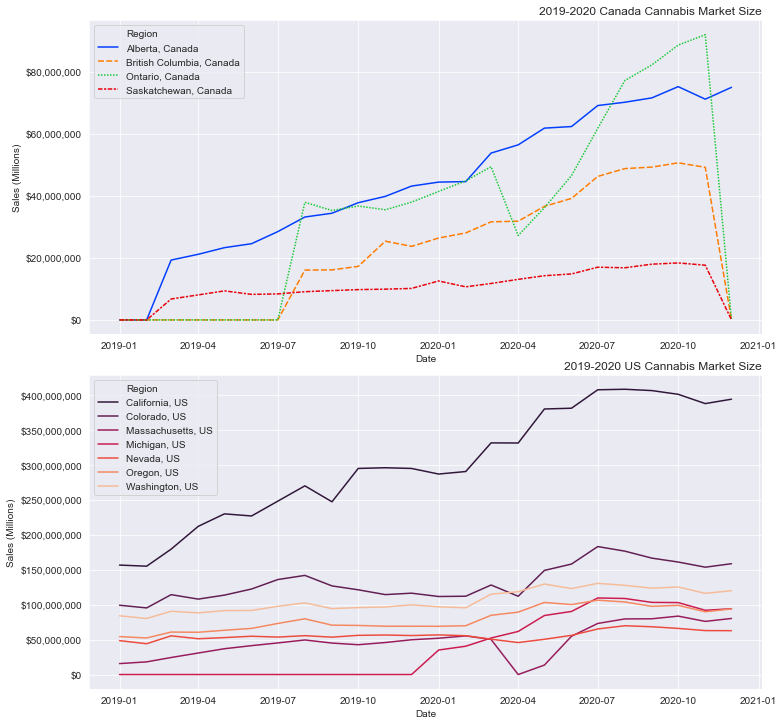

In [13]:
#Set the grid style for the upcoming Seaborn plot
sns.set_style(style="darkgrid")

#Create a 2 by 1 subplot which allows the charts to display horizontally one on top of the other
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))

ax1.set_title("2019-2020 Canada Cannabis Market Size", loc = "right")
ax2.set_title("2019-2020 US Cannabis Market Size", loc = "right")

#Assign the Date columns from the market size datasets to their own variables
x = rev["Date"]
x1 = us_rev["Date"]

#Format the yaxis so the ticks appeared in $,. currency
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax2.yaxis.set_major_formatter(tick) 

fig.tight_layout()

#Create the linplot using seaborn.  Assigned the 2 markets their own color palette
palette = sns.color_palette("bright", 4)
size = sns.lineplot(data = rev, x="Date", y = "Sales (Millions)", 
                              hue = "Region", palette = palette, 
                              style = "Region", ax=ax1)

us_palette = sns.color_palette("rocket", 7)
us_size = sns.lineplot(data = us_rev, x="Date", y = "Sales (Millions)", 
                              hue = "Region", palette = us_palette, 
                              style = "Region", dashes=False, ax=ax2)

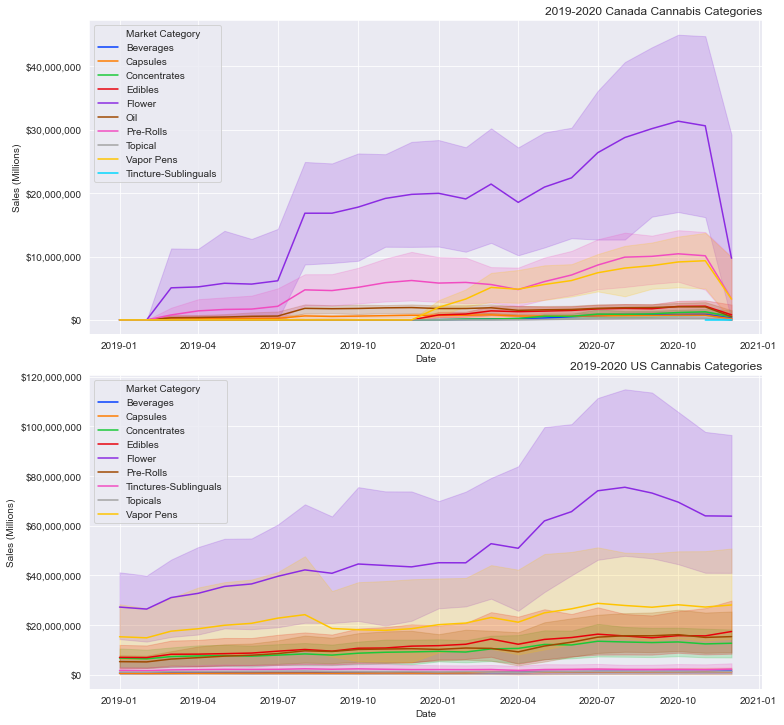

In [14]:
#Create a 2 by 1 subplot which allows the charts to display horizontally one on top of the other
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (10, 10))

ax1.set_title("2019-2020 Canada Cannabis Categories", loc = "right")
ax2.set_title("2019-2020 US Cannabis Categories", loc = "right")

#Assign the Date columns from the market size datasets to their own variables
x = rev_category["Date"]
x1 = us_rev_category["Date"]

#Format the yaxis so the ticks appeared in $,. currency
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick) 
ax2.yaxis.set_major_formatter(tick) 

#Create the lineplot using seaborn.
palette = sns.color_palette("bright", 10)
size = sns.lineplot(data = rev_category, x=x, y = "Sales (Millions)", 
                              hue = "Market Category", palette = palette, 
                              style = "Market Category",dashes=False, ax=ax1)

us_palette = sns.color_palette("bright", 9)
us_size = sns.lineplot(data = us_rev_category, x=x1, y = "Sales (Millions)", 
                              hue = "Market Category", palette = us_palette, 
                              style = "Market Category", dashes=False, ax=ax2)

Text(1.0, 1.0, '2020 US Cannabis Product Sales vs. Confirmed COVID Cases')

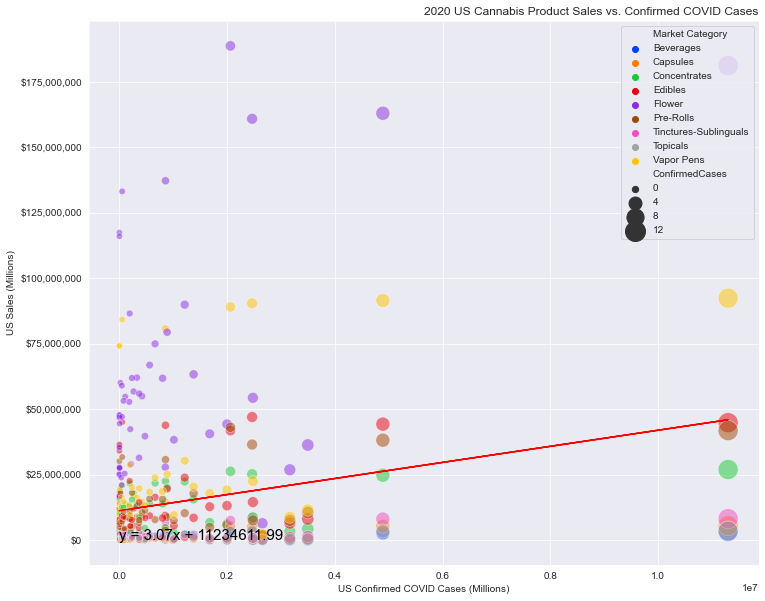

In [20]:
#Group clients
us_covid_data = round(covid_data.groupby(["Date", "Region"], as_index=False)[["ConfirmedCases"]].sum(),0)
us_rev_category.drop(us_rev_category[us_rev_category["Date"] <= "2019/12/1"].index, inplace = True) 
merged_rev_covid = pd.merge(us_rev_category, us_covid_data, how='inner',  on=["Date", "Region"])
merged_rev_covid

#Create a subplot to use ax and fig objects
fig, (ax1) = plt.subplots(1,1, figsize = (12, 10))

#Format the yaxis so the ticks appeared in $,. currency
fmt = '${x:,.0f}'
fmt2 = "{x:,.0f}"
tick = mtick.StrMethodFormatter(fmt)
tick2 = mtick.StrMethodFormatter(fmt2)
ax1.yaxis.set_major_formatter(tick) 
ax2.yaxis.set_major_formatter(tick2)

#Assign ConfirmedCases and Sales (Millions) to variables
covid_cases = merged_rev_covid["ConfirmedCases"]
us_category_sales = merged_rev_covid["Sales (Millions)"]

#Linear Regression
x_values = covid_cases
y_values = us_category_sales
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.05,30),fontsize=15,color="black")

#Plot miles per gallon against horsepower with other semantics
covid_scatter = sns.scatterplot(x="ConfirmedCases", y="Sales (Millions)", hue="Market Category", size="ConfirmedCases",
            sizes=(40, 400), alpha=.5, palette="bright", data=merged_rev_covid, ax=ax1, legend = "brief")

plt.xlabel("US Confirmed COVID Cases (Millions)")
plt.ylabel("US Sales (Millions)")
plt.legend(loc = "best")
plt.title("2020 US Cannabis Product Sales vs. Confirmed COVID Cases", loc="right")